<a href="https://colab.research.google.com/github/karae15/BDuz_intro_ml/blob/main/508201107_rev14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DTM 610E - MACHINE LEARNING APPLICATIONS IN MARITIME INDUSTY

## PROJECT 1: SHIP AS A WAVE BUOY

# 1. INTRODUCTION

## Project Background, Context and Objective of the Problem

Wave characteristics such as significant wave height, peak period, and main direction have an important effect on all aspects of ship operations. Yet, the estimation of these characteristics in real time in an accurate, robust, and efficient manner poses a significant challenge. Current approaches include using wave buoys, wave radars, weather forecasts, and regression based on ship motion statistics. Wave buoys and weather forecasts are not always available and/or reliable, and wave radars are expensive. Statistics-based methods work reasonably well for wave height but fail to estimate peak period and relative wave direction. The concept of SAWB suggests that to infer local sea state information in real time, only ship motions are needed.

Dr. Bülent DÜZ

In this project, a machine learning approach will be employed in the SAWB concept. Specifically, a neural network will be utilized to passively estimate wave characteristics from time series data of 6-DOF ship motions. An impression is shown in Fig 1 below.

![Figure 1: Artist's Impression of SAWB](https://drive.google.com/uc?id=10HDkj35-B2BdHxGK_dzvu48w4I-9IBhf)

*Figure 1: Artist's Impression of SAWB*

# 2. METHODOLOGY

## Data Collection

## Feature Selection

## Model Architecture

## Hyperparameter Selection

Hyperparameter selection is crucial in machine learning because the performance of a model is highly dependent on the values chosen for its hyperparameters. Hyperparameters are external configurations that are not learned from the data but are set before the training process begins. These parameters significantly impact a model's ability to learn patterns, generalize to new data, and achieve optimal performance.

#### Batch Size



The choice of batch size in neural network training is a crucial factor that can impact both computational efficiency and model performance. Larger batch sizes can enhance computational efficiency, particularly on GPU hardware, and provide a smoother gradient estimate, leading to more stable convergence. However, smaller batch sizes introduce more noise into the optimization process and can sometimes lead to better generalization, which can have both positive and negative effects. It's essential to strike a balance based on the computational resources, the characteristics of the data, and the desired generalization properties.

<u>I selected a **batch size of 64** at the beginning, considering our dataset of 9927 data points is a reasonable starting point.</u>

#### Activation Function

Activation functions determine the outputs of artificial neural network nodes. The choice of activation function can significantly impact a model's learning ability and performance. The choice of activation function depends on the specific characteristics of the dataset and the requirements of the task. There are numerous activation functions, but some of them explained in the lecture are given below:

ReLU (Rectified Linear Unit): ReLU produces a linear output for positive inputs and a zero output for negative inputs. It can accelerate training and is commonly used for hidden layers.

Sigmoid: Sigmoid squashes the input values between 0 and 1, which is useful for binary classification problems. It's often used in the output layer for binary classification tasks.

Tanh (Hyperbolic Tangent): Tanh is similar to the sigmoid but squashes input values between -1 and 1. It can be useful in the hidden layers to model data with negative and positive values.

Leaky ReLU: Leaky ReLU allows a small, positive gradient for negative inputs, preventing the dead neuron problem. It can be beneficial when ReLU results in dead neurons during training.

In this project, we have six-DOF ship motion data, which contains positive and negative values, but our target data are wave characteristics, which are wave height (Hs), wave period (Tp), and wave direction (Dir). The first two of these target features can take only positive values, while the third can be positive or negative. I will train my NN to predict wave heights and/or wave period, it means that my predicted values will be positive.

<u>In this context, I selected  the **ReLu activation** function at the beginning.</u>


#### Loss Function

The loss function quantifies the difference between the predicted values generated by the model and the actual ground truth values in the training data. The selection of it is a critical decision in machine learning, as it directly impacts the model's training process and the quality of its predictions.  The goal during training is to minimize this loss, guiding the model towards making accurate predictions.

There are a few common loss functions, such as mean squared error (MSE), mean absolute error (MAE), and cross-entropy loss (log loss). MSE is suitable for regression problems; it penalizes larger errors heavily; MAE is robust to outliers; it provides a linear penalty for errors; it is suitable for classification problems; and it encourages the model to output probability distributions.

In the data analysis part (next section), we will see that we do not have so many outliers in the data, so we should be able to detect the little errors sensitively.

<u>So that, I selected to continue with the **MSE Loss Function**, as it is also preferred in the reference papers. </u>


#### Optimizer

The choice of optimizer plays a pivotal role in the training of neural networks, influencing the convergence speed and overall performance of the model.
Different optimizers employ distinct algorithms to adjust model parameters, and their suitability depends on factors like dataset size, architecture complexity, and computational resources. Classic optimizers like stochastic gradient descent (SGD) and its variants, including mini-batch gradient descent, are fundamental choices, each with its own advantages based on the dataset's scale. Adaptive optimizers, such as Adam, dynamically adjust learning rates for individual parameters, offering adaptability and often proving effective across diverse tasks. Adam, in particular, has gained popularity for its robustness and general applicability.

<u>I selected **SGD Optimizer** at the beginning. But, right after I determined other hyperparameters, I will also investigate how the results were changing in the Adam optimizer.</u>


#### Learning Rate

Selecting an appropriate learning rate is a critical aspect of training neural networks. While there is no universal learning rate that suits all scenarios, common practices include using learning rate schedules to dynamically adjust the learning rate during training. A grid search involving a range of learning rates and observing performance on a validation set can aid in identifying an optimal value. Additionally, employing learning rate finder techniques, where the learning rate is gradually increased during the early stages of training, can reveal suitable values. It's essential to consider the characteristics of the dataset, model architecture, and optimization algorithm when fine-tuning the learning rate, as these factors play a crucial role in achieving effective convergence and model performance.

<u>In this project, I selected a **learning rate of 0.003** as a beginning; it was selected in the reference papers.</u>

#### Regularization Factor

A regularization factor is used to prevent overfitting, where a model performs well on the training data but fails to generalize to new, unseen data. It comes from the regularization term added to the loss function. There are L1 and L2 regularizations, which refer to the sum of the absolute values, or squares, of the model parameters, respectively.

Smaller values of λ result in weaker regularization, potentially leading to overfitting. If regularization increases too much, NN forces weight matrices to have zero values, risking underfitting. In order to find the optimum regularization factor, a grid search is commonly used.

<u>I started with using **no regularization factor (λ = 0)**. If I see any high-variance problem (overfitting), I will start to use.</u>


## Pooling

Pooling is a downsampling operation commonly used in convolutional neural networks (CNNs) to reduce the spatial dimensions of the feature maps. The purpose of pooling is to retain the most important information while reducing the computational load and controlling overfitting.

There are two main types of pooling which are max pooling and average pooling. Max pooling takes the maximum value from a group of neighboring values to retain the most active features and discards less relevant information. Average pooling takes the average value from a group of neighboring pixels to provide a smoother downsampling and is less likely to discard subtle features.

Since the ship will move in a certain pattern according to the incoming waves, I thought that I cannot evaluate a continuous case by taking only the highest values. Because of that I selected **average pooling** in my CNN architecture. </u>

## Neural Network Updating and Hyperparameter Tuning



We will look at Neural Network updating and Hyperparameter tuning as the steps we need to follow and in which order to eliminate underfitting (high-bias problem) and overfitting (high-variance problem) in our loss functions.

As explained in the DTM610E lecture, we can follow the ordered steps given below to reduce under-fitting problem:
- Make the model bigger/more complex (e.g. adding layers)
- Reduce regularization
- Error anaysis
- Choose a different model architecture
- Tune hyperparameters
- Add features

We can follow the ordered steps given below to reduce over-fitting problem:
- Add more training data (if possible)
- Add normalization
- Add data augmentation (if possible)
- Increase regularization
- Error analysis
- Choose a different model architecture
- Tune hyperparameters
- Early stopping
- Remove features
- Reduce model size

# 3. DATA ANALYSIS (CODES STARTING OVER HERE)


## Importing the Necessary Libraries & Modules

In [123]:
%reset -f

In [125]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import time
import random
import torch.nn.functional as F
from matplotlib.ticker import FormatStrFormatter
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, TensorDataset
from torch import nn
from torch import optim
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from google.colab import drive

## Authenticate and mount your Google Drive

In [126]:
# Authenticating and mounting Google Drive
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleDrive(gauth)
drive.mount('/content/drive')

file_path = '/content/drive/MyDrive/Colab Notebooks/DTM610E/PROJECT 1/SAWB_data.npz'
# Creating a GoogleDrive instance
drive_service = GoogleDrive(gauth)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Importing the Simulation Results Data

In [127]:
data = np.load(file_path, allow_pickle=True)

X = data['X']
Hs = data['Hs']
Tp = data['Tp']
Dir = data['Dir']

## Control of the Data


How can we check & analyze our data ? Here, some recommendations from the online websites/blogs/forums:


1.   Checking Missing Values
2.   Statistical Test
3.   Time-Series Analysis
4.   Cross-Validation
5.   Correlation Analysis



First of all, I want to see the distribution of my data along Hs, Tp and Dir. While we know that our data is uniformly distributed with Latin Mixed Sampling, we also know that we have missing data because the ship capsized. We can use a histogram plot to see the distribution and perhaps see some clues as to what wave characteristics might have caused the ship to capsize.

In [ ]:
# Creating subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Define the variables and titles
variables = [Hs, Tp, Dir]
titles = ['Hs', 'Tp', 'Dir']

# Plotting histograms
for i, (var, title) in enumerate(zip(variables, titles)):
    # Calculating histogram
    counts, bins, patches = axes[i].hist(var, bins=20, edgecolor='black')

    # Finding the index of the shortest bin
    min_bin_index = np.argmin(counts)

    # Setting different color for the shortest bin, so we will be able to detect it more easily.
    for j, patch in enumerate(patches):
        if j == min_bin_index:
            patch.set_facecolor('lightcoral')
        else:
            patch.set_facecolor('lightblue')

    axes[i].set_title(f'Histogram for {title}')
    axes[i].set_xlabel(title)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [ ]:
# Create a polar plot
plt.figure(figsize=(5, 5))
plt.subplot(projection='polar', theta_offset = -1.5708)

# Plot the histogram for Dir
counts, bins, patches = plt.hist(np.radians(Dir), bins=20, edgecolor='black')

# Find the index of the minimum bin value
min_bin_index = np.argmin(counts)

# Set color for each bin
for i, (count, patch) in enumerate(zip(counts, patches)):
    color = 'lightblue' if i != min_bin_index else 'lightcoral'
    patch.set_facecolor(color)

plt.title('Polar Plot for Input Data Distribution According to Wave Directions')
plt.show()

As can be seen in the graphs, our data is quite uniformly distributed over the input parameters.

However, for wave height around 7.5m, wave period around 8s and especially for wave incidence angle around 100 degrees, there is a lack of ship motion data. From this, it can be concluded that the 73 data lost due to the capsize of the ship is realized at the specified values of Hs and Tp, especially for the cases where the wave direction is 100 degrees.

Secondly, I want to check if our data is shuffed. It is important because it helps prevent the model from learning patterns that are specific to the order of the data. If the data is not shuffled and is presented to the model in a certain order, the model might learn biases related to the order instead of true underlying patterns in the data.

In [ ]:
# Print the first 100 elements of each feature to check if they are shuffled or not.
items, rows, columns = 100,10,10

subset_Hs,subset_Tp,subset_Dir  = Hs[:items].reshape((rows, columns)),Tp[:items].reshape((rows, columns)),Dir[:items].reshape((rows, columns))

# Print the reshaped arrays separately
print("Wave Height (Hs):")
for row in subset_Hs:
    formatted_values = ", ".join("{:.2f}".format(value) for value in row)
    print(formatted_values)

print("\nWave Period (Tp):")
for row in subset_Tp:
    formatted_values = ", ".join("{:.2f}".format(value) for value in row)
    print(formatted_values)

print("\nWave Direction (Dir):")
for row in subset_Dir:
    formatted_values = ", ".join("{:.2f}".format(value) for value in row)
    print(formatted_values)

We can also check the statistics of our data by looking the mean values and standard deviations. The mean and standard deviation can be used to identify outliers. They also provide a quick summary of the data distribution. A higher standard deviation indicates higher variability. If our data is not normally distributed, we might consider normalizing it. These informations can guide our choice of machine learning algorithms.

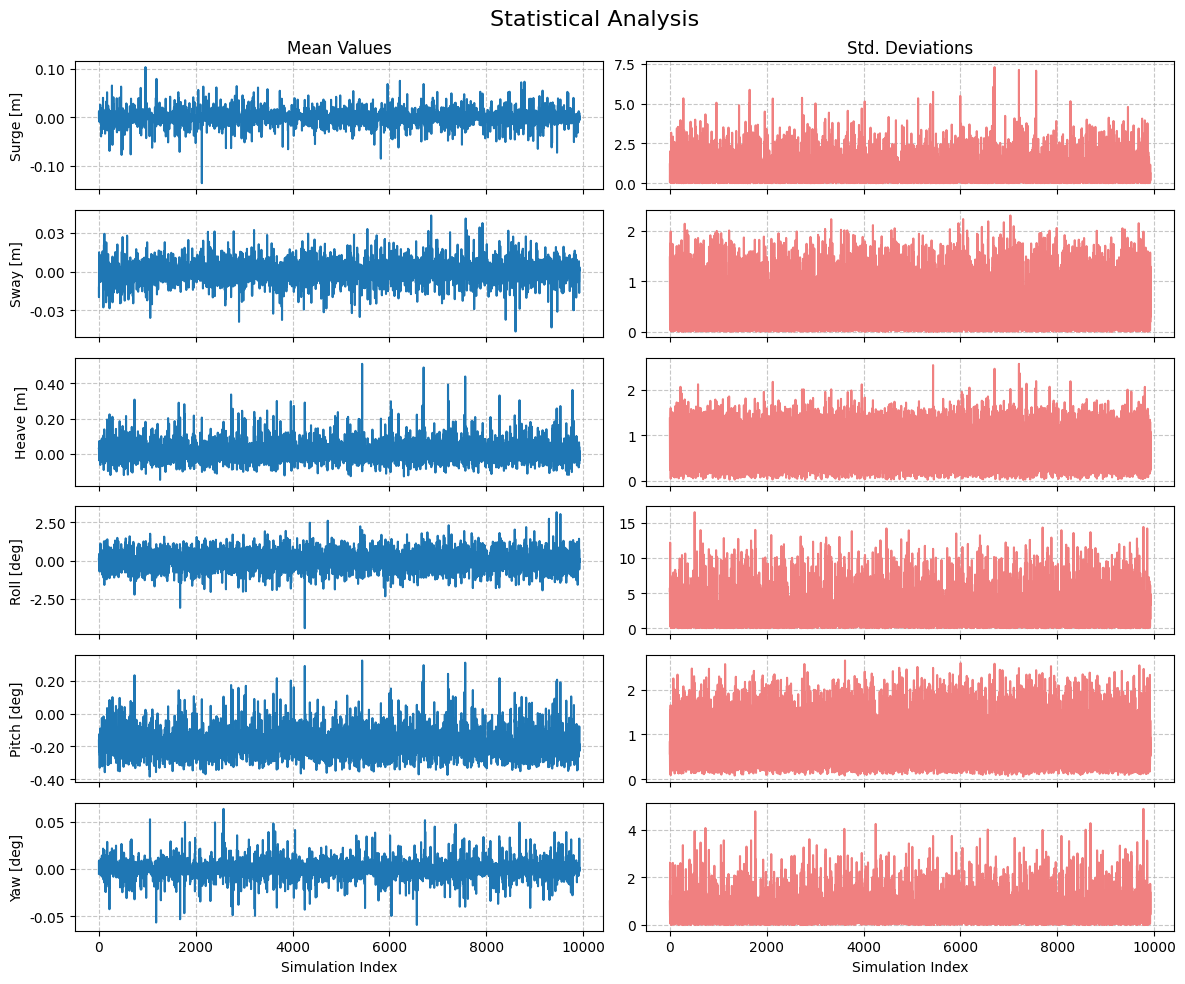

In [113]:
motion_names = ["Surge", "Sway", "Heave", "Roll", "Pitch", "Yaw"]

for i, motion_name in enumerate(motion_names):
    motion_index = i
    motion_values = X[:, motion_index, :]

# Calculate mean and std values for each simulation
mean_simulation_values = np.mean(X, axis=2)
std_simulation_values = np.std(X, axis=2)

# Create subplots in two columns
fig, axes = plt.subplots(6, 2, figsize=(12, 10), sharex=True)

# Loop through each motion and plot mean and std values for each simulation
for i, motion_name in enumerate(motion_names):
    motion_mean_values = mean_simulation_values[:, i]
    motion_std_values = std_simulation_values[:, i]

    # Plot mean values
    axes[i, 0].plot(motion_mean_values, label=f'Mean {motion_name}')
    axes[i, 0].set_ylabel(f'{motion_name}')
    axes[i, 0].grid(True, linestyle='--', alpha=0.7)
    axes[i, 0].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))  # Format y-axis labels with two decimal points

    # Plot std deviation values
    axes[i, 1].plot(motion_std_values, label=f'Std Dev {motion_name}', color='lightcoral')
    axes[i, 1].set_ylabel('')
    axes[i, 1].grid(True, linestyle='--', alpha=0.7)
    axes[i, 0].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))  # Format y-axis labels with two decimal points

    # Add units to y-axis labels
    if i < 3:
        axes[i, 0].set_ylabel(f'{motion_name} [m]')
    else:
        axes[i, 0].set_ylabel(f'{motion_name} [deg]')

# Set common x-label
axes[-1, 0].set_xlabel('Simulation Index')
axes[-1, 1].set_xlabel('Simulation Index')

# Add titles to columns
fig.suptitle('Statistical Analysis', fontsize=16)
axes[0, 0].set_title('Mean Values')
axes[0, 1].set_title('Std. Deviations')

# Adjust layout for better spacing
plt.tight_layout()  # Adjust the rect parameter for suptitle position
plt.show()

We know that we have data, which is a sequence of measurements recorded at successive points in time. In time-series data, we can analyze the data to get information about its components, which are trend, seasonality, cyclic patterns, random or irregular fluctuations, etc.

We can prefer visualization methods, residual analysis, anomaly detection, dynamic time warping (DTW), frequency analysis (spectral analysis techniques). I will apply a frequency analysis to identify dominant frequencies and periodicities in the our time series data.

# 4. MODEL TRAINING AND EVALUATION

## Prepocessing the Data for Training

In [ ]:
# 5- Standardization of the data

def standardize(data):
    """
    Z-score normalize the input data.

    Parameters:
        data (numpy array): Input data to be normalized.

    Returns:
        normalized_data (numpy array): Z-score normalized data.
    """
    mean = np.mean(data, axis=0)
    std = np.std(data, axis=0)
    normalized_data = (data - mean) / std

    return normalized_data

    allmotions_normalized = standardize(X)


It is common to split the dataset into three parts: training, validation, and test sets.

The training data is used to teach the model to discern patterns, relationships, and features within the dataset.

Following the training phase, the model's generalization capabilities are assessed using the validation data—a separate dataset it has not encountered previously. The validation set plays a crucial role in fine-tuning the model's hyperparameters, such as learning rate and architecture, to enhance performance and mitigate overfitting.

Once the model is trained and fine-tuned, the test data, an entirely independent dataset unseen during training and validation, is employed for an unbiased evaluation of the model's real-world performance.

<u>As a similar distribution made by the reference papers, I preferred to split my data as **%80 Training, %15 Testing,** and **%4.27 Validation** manually.</u>

In [128]:
# Split the data for all six DOF motions
motions_train = torch.Tensor(np.array(X[:8000,:,:]))
motions_test = torch.Tensor(np.array(X[8000:9500,:,:]))
motions_validation  = torch.Tensor(np.array(X[9500:,:,:]))

Hs_train, Hs_test, Hs_validation = torch.Tensor(Hs[:8000]), Hs[8000:9500], Hs[9500:]

Hs_train, Hs_test, Hs_validation = (
    torch.FloatTensor(Hs_train).view(-1, 1),
    torch.FloatTensor(Hs_test).view(-1, 1),
    torch.FloatTensor(Hs_validation).view(-1, 1))

# Print the shapes of the training, test, and validation sets for all six DOF motions
print("All Motions Data:")
print(f"Training set shape: {motions_train.shape}")
print(f"Test set shape: {motions_test.shape}")
print(f"Validation set shape: {motions_validation.shape}")

# Print the shapes of the training and test sets for Hs
print("\nData:")
print(f"Training set shape: {Hs_train.shape}")
print(f"Test set shape: {Hs_test.shape}")
print(f"Validation set shape: {Hs_validation.shape}")


All Motions Data:
Training set shape: torch.Size([8000, 6, 1920])
Test set shape: torch.Size([1500, 6, 1920])
Validation set shape: torch.Size([427, 6, 1920])

Data:
Training set shape: torch.Size([8000, 1])
Test set shape: torch.Size([1500, 1])
Validation set shape: torch.Size([427, 1])


## Defining the Neural Network Architecture

In order to define our Neural Network, first we should decide which type of NN we will create. At the beginning of my study, I created a MLP architecture, but due to the data size, it took so much time and also did not give the results that I desired. So that, I changed the architecture as CNN.

As a beginning of a NN, it is important to define hyperparameters. They significantly influence the performance and behavior of the algorithms. Unlike model parameters, which are learned from the training data (such as weights), hyperparameters are set before the training process and dictate the overall structure and configuration of the model.

In [129]:
# Hyperparameters for my Neural Network - Part 1
batch_size = 128
input_size = 1920*6        # We have six motions, 1920 time-series data for each motion and per simulation.
hidden_sizes = [256,64]
output_size = 1

In [130]:
# Create data loaders
train_loader = DataLoader(dataset=TensorDataset(motions_train, Hs_train), batch_size=batch_size)
test_loader = DataLoader(dataset=TensorDataset(motions_test, Hs_test), batch_size=batch_size)
validation_loader = DataLoader(dataset=TensorDataset(motions_validation, Hs_validation), batch_size=batch_size)

In [141]:
# Define a simple CNN model
class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()
        self.conv1 = nn.Conv1d(in_channels=6, out_channels=16, kernel_size=3, stride=1, padding=1)
        self.pool = nn.AvgPool1d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv1d(16, 32, 3, 1, 1)
        self.fc1 = nn.Linear(32 * 480, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, output_size)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 32 * 480)  # Adjust the size based on the output size of the last conv layer
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Instantiate the CNN model
model = CNNModel()

In [142]:
# Hyperparameters for my Neural Network - Part 2

epochs = 100               # Number of total sweeps over whole data
base_lr = 0.0001           # Learning rate beginning value
criterion = nn.MSELoss()   # Mean Square Error criterion
optimizer = optim.SGD(model.parameters(), lr=base_lr)    # Stochastic Gradient Descent optimizer (I will also try Adam optimizer)
#scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=epochs/4, gamma=0.1) # Learning Rate Scheduler

Epoch: 1/100 - Total Training Loss: 9.4540
Epoch: 1/100 - Validation Loss: 16.2027
Epoch: 2/100 - Total Training Loss: 6.7704
Epoch: 2/100 - Validation Loss: 8.3909
Epoch: 3/100 - Total Training Loss: 2.6766
Epoch: 3/100 - Validation Loss: 3.5728
Epoch: 4/100 - Total Training Loss: 1.6907
Epoch: 4/100 - Validation Loss: 3.0167
Epoch: 5/100 - Total Training Loss: 1.4338
Epoch: 5/100 - Validation Loss: 2.5805
Epoch: 6/100 - Total Training Loss: 1.2307
Epoch: 6/100 - Validation Loss: 2.2447
Epoch: 7/100 - Total Training Loss: 1.0771
Epoch: 7/100 - Validation Loss: 1.9990
Epoch: 8/100 - Total Training Loss: 0.9658
Epoch: 8/100 - Validation Loss: 1.8252
Epoch: 9/100 - Total Training Loss: 0.8868
Epoch: 9/100 - Validation Loss: 1.7031
Epoch: 10/100 - Total Training Loss: 0.8304
Epoch: 10/100 - Validation Loss: 1.6148
Epoch: 11/100 - Total Training Loss: 0.7887
Epoch: 11/100 - Validation Loss: 1.5475
Epoch: 12/100 - Total Training Loss: 0.7562
Epoch: 12/100 - Validation Loss: 1.4931
Epoch: 13

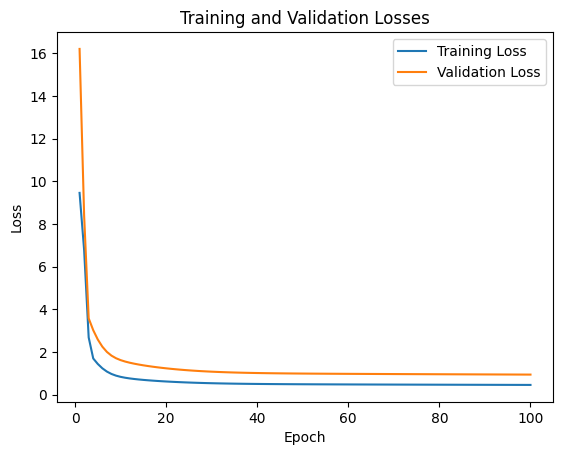

In [143]:
# Training Loop
print_every = 1

# Lists to store training and validation losses for plotting
train_losses = []
validation_losses = []

# Record the start time
start_time = time.time()

for epoch in range(epochs):
    total_loss = 0

    for data, target in iter(train_loader):

        # Forward pass
        output = model(data)

        # Compute the loss
        loss = criterion(output, target)

        # Backward pass
        loss.backward()

        # Gradient Descent Optimization
        optimizer.step()
        optimizer.zero_grad()

        total_loss += loss.item()

    # Print training loss after each epoch
    if (epoch + 1) % print_every == 0:
        print("Epoch: {}/{} - Total Training Loss: {:.4f}".format(epoch + 1, epochs, total_loss / batch_size))

    # Store training loss after each epoch
    train_losses.append(total_loss / batch_size)

    # Validation
    with torch.no_grad():
        model.eval()
        validation_loss = sum(criterion(model(sixdof), target) for sixdof, target in validation_loader)
        validation_loss /= len(validation_loader)

    model.train()
    # Print validation loss after each epoch
    if (epoch + 1) % print_every == 0:
        print("Epoch: {}/{} - Validation Loss: {:.4f}".format(epoch + 1, epochs, validation_loss))

    # Store validation loss after each epoch
    validation_losses.append(validation_loss)

end_time = time.time()

total_training_time = end_time - start_time

hours = int(total_training_time // 3600)
minutes = int((total_training_time % 3600) // 60)
seconds = int(total_training_time % 60)

print(f"\nTotal Training Time: {hours:.2f} hours, {minutes:.2f} minutes, {seconds:.2f} seconds\n")

# Plot training and validation losses after every epoch
plt.plot(range(1, epochs + 1), train_losses, label='Training Loss')
plt.plot(range(1, epochs + 1), validation_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Losses')
plt.legend()
plt.show()

In [ ]:
import random
import numpy as np

# Initialize a list to store MSE values
test_mse_values = []

# Test
with torch.no_grad():
    model.eval()

    for sixdof, target in test_loader:
        # Forward pass
        output = model(sixdof)

        # Compute the MSE for each simulation in the batch
        mse_values = F.mse_loss(output, target, reduction='none').cpu().numpy()

        # Append MSE values to the list
        test_mse_values.extend(mse_values)

# Convert the list to a numpy array
test_mse_values = np.array(test_mse_values)

# Plot histogram
plt.hist(test_mse_values, bins=100, color='skyblue', edgecolor='black')
plt.xlabel('Mean Squared Error (MSE)')
plt.xlim(0, 10)
plt.ylabel('Frequency')
plt.title('Distribution of MSE for Test Data')
plt.show()


# 5. RESULTS

### Configurations
I' ve tried a lot of configuration to find the optimum hyperparameters.

#### Configuration 1

**Selected Hyperparameters:**

- input size = 6*1920 (whole data)
- output size = 1
- batch size = 64
- activation functions = ReLu
- optimizer = Adam
- learning rate = 0.003
- regularization = None
- loss function = Mean Square Error

**Selected Architecture:** CNN with 3 convolutional layer and 3 fully-connected layers.

- First convolutional layer with 6 input channels, 16 output channels, a kernel size of 3, stride of 1, and padding of 1.

- Max-pooling layer with a kernel size of 2 and stride of 2.

- Second convolutional layer with 16 input channels (output channels from the previous layer), 32 output channels, a kernel size of 3, stride of 1, and padding of 1.

- First Fully-connected layer has 32 * 480 (resulting from the previous convolutional layers) input size and 120 output sşze.

- Second Fully-connected layer has 120 (from previous layer output) input size and 84 output size.

- Third Fully-connected layer has 84 input size and 1 output size.

Training and Validation Loss Shapes for this configuration is given below:

![Conf1](https://drive.google.com/uc?id=1kLcSPaPfcU9qDLScGzBrADFyfDx1tLza)

It is seen that our training loss and validating loss are small, but not converge. The oscillation of the loss function during training can stem from various factors, such as inappropriate learning rates, poor initialization of model parameters, very small batch size, or the complexity of the model architecture. I decided to change the hyperparameters first, instead of changing the model architecture. See the results in Configuration 2 section below.

#### Configuration 2

**Selected Hyperparameters:**

- input size = 6*1920 (whole data)
- output size = 1
- batch size = 64
- activation functions = ReLu
- optimizer = Adam
- **learning rate = 0.0005** (Updated Hyperparameter)
- regularization = None
- loss function = Mean Square Error



Training and Validation Loss Shapes for this configuration is given below:

![Conf2](https://drive.google.com/uc?id=1OEPTLBbQttntUl0Pski2cnH7iFCVwRPH)

It is seen that our training loss and validating loss are small, and convergence is better than configuration 1. But there is still oscillation in the loss functions, which I want to remove. I will continue hyperparameter tuning. In the third configuration, I want to change batch size. We know that increasing batch size may provide better convergence. See the results in the Configuration 3 section below.

#### Configuration 3

**Selected Hyperparameters:**

- input size = 6*1920 (whole data)
- output size = 1
- **batch size = 128** (Changed)
- activation functions = tanh
- optimizer = Adam
- **learning rate = 0.0005**
- regularization = None
- loss function = Mean Square Error



Training and Validation Loss Shapes for this configuration is given below:

![Conf2](https://drive.google.com/uc?id=1OEPTLBbQttntUl0Pski2cnH7iFCVwRPH)

It is seen that our training loss and validating loss are small, and convergence is better than configuration 1. But there is still oscillation in the loss functions, which I want to remove. I will continue hyperparameter tuning. In the third configuration, I want to change batch size. We know that increasing batch size may provide better convergence. See the results in the Configuration 3 section below.

# DISCUSSION